# Prediction using Supervised ML



## Author: Rakshita Patil

### In this task we have to predict how much will the student score if the student studies for 9.25 hrs/day




#### Importing all required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Reading data from link

In [2]:
data=pd.read_table("http://bit.ly/w-data",sep=",")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#
There are 25 observations and two columns in this data where Scores is the target column.
Since the target column Scores is continuous in nature and there is only one feature in the data,this is Simple Linear Regression.

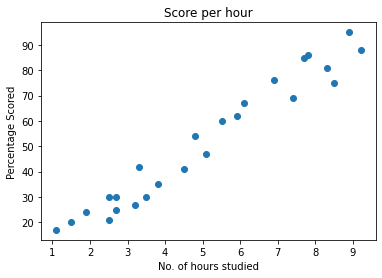

In [4]:
plt.scatter(data=data,x="Hours",y="Scores")
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage Scored")
plt.title("Score per hour")
plt.show()

#### From the graph,we can see there is positive linear relationship between No. of hours studied and Percentage scored 

### Splitting data into feature and target

In [5]:
x=data.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [6]:
y=data.iloc[:,-1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Training the data 

In [7]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

# Building model 

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

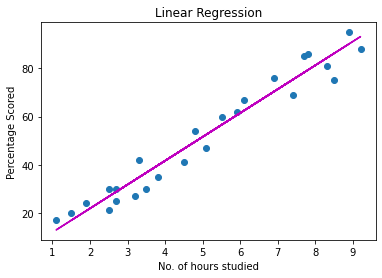

In [9]:
line=lr.coef_*x+lr.intercept_
plt.scatter(x,y)
plt.plot(x,line,color="m")
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage Scored")
plt.title("Linear Regression")
plt.show()

### Comparing actual vs predicted values

In [10]:
pd.DataFrame({"Actual":ytest,"Predicted":ypred,"loss":np.abs(ytest-ypred)})

,Actual,Predicted,loss
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


## Predicting new observation

In [11]:
new_hours = 9.25
new_pred = lr.predict([[new_hours]])
print(f"No. of hours:{new_hours} \nPercentage Scored:{new_pred[0]}")
    

No. of hours:9.25 
Percentage Scored:93.69173248737538


# Evaluating the model

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(ytest,ypred)
mse=mean_squared_error(ytest,ypred)
rmse=np.sqrt(mse)
r2=r2_score(ytest,ypred)

print(f"Mean Absolute Error:{mae}\nMean Squared Error:{mse}\nRoot Mean Squared Error:{rmse}\nAccuracy:{r2*100}")

Mean Absolute Error:4.183859899002975
Mean Squared Error:21.5987693072174
Root Mean Squared Error:4.6474476121003665
Accuracy:94.54906892105356
